In [1]:
import os 
#agregar al path el lugar de la instalacion de graphviz (dot.exe)
os.environ["PATH"] += os.pathsep + r'C:\Users\jimmy\Anaconda3\Library\bin\graphviz'

In [2]:
import urllib.request as url
import pandas as pd
from sklearn import tree
import graphviz as gv
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
#obtener datos, hay que limpiarlo
target_url = ("http://www.stat.cmu.edu/~larry/all-of-statistics/=data/coris.dat")
data = url.urlopen(target_url)
html = data.read()
html
with open('coris.csv', 'wb') as f:
     f.write(html)

#### Descripción de los datos
The Coronary Risk-Factor Study (CORIS) data involve 462 males between the ages of 15 and 64 from three rural areas in South Africa, (Rousseauw et al. (1983)). The outcome Y is the presence (Y = 1) or absence (Y = 0) of coronary heart disease. There are 9 covariates: systolic blood pressure, cumulative tobacco (kg), ldl (low density lipoprotein cholesterol), adiposity, famhist (family history of heart disease), typea (type-A behavior), obesity, alcohol (current alcohol consumption), and age.

In [3]:
data=pd.read_csv('coris.csv',sep=',',header=0)
data.iloc[:2,:]

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1


In [4]:
#### Arbol con dos atributos
df1=data['age']
df2=data['sbp']
data2 = pd.concat([df1, df2], axis=1, join_axes=[df1.index])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    data2, data['chd'], test_size=0.30, random_state=42)
len(y_test)

139

In [6]:
print('Personas con enferdad de las coronarias')
print(pd.value_counts(data['chd']))
print('Personas con edad menor de 50 años')
print(sum([1 for i in data['age'] if i<=50]))

Personas con enferdad de las coronarias
0    302
1    160
Name: chd, dtype: int64
Personas con edad menor de 50 años
290


### Arboles 
A grandes rasgos los árboles de clasificación son métodos que particionan el espacio de covariables $\mathcal{X}$ en pienzas disjuntas y entonces clasificamos las observaciones de acuerdo a la partición a la que pertencen.

Supongamos que se tinen dos categorias  $y\in \mathcal{Y}=\{0,1\}$. Y tenemos solamente una covariable $X$. Escogemos un punto t que divide a la recta a la recta real en dos conjunto $A_1=(-\infty,t]$, $A_2=(t,\infty)$. Sea $\hat{p}_s(j)$ la proporción de observaciones en $A_s$, tal que $Y_i=j$. 
$$
\hat{p}_s(j)=\dfrac{\sum_{i=1}^n I(Y_i=j,X_i\in A_s)}{\sum_{i=1}^n I(X_i\in A_s)}
$$
para $s=1,2$ y $j=0,1$. La impureza del split se define como, 
$$
I(t)=\sum_{s=1}^2\gamma_s
$$
donde $\gamma_s=1-\sum_{j=0}^1 \hat{p}_s(j)^2$
Esta es una medida de la impureza y se le conoce como indice de $\textbf{Gini}$

Ventajas

* Fácil de interpretar.
* No paramétrico
* A los bancos les encanta en credit scoring 

Trataré de no hablar mal de los árboles como de las redes neuronales, pero...

Deventajas 

* Sobreajuste
* Pérdida de información al categorizar variables continuas
* Precisión: si pueden usar mejor SVM, usenlos! tienen tasas de error más bajas hasta 30 %  
* Inestabilidad: un pequeño cambio en los datos puede modificar ampliamente la estructura del árbol
* Aguas con la heuristica 

Parametros
1. $\textit{max_leaf_nodes}$ es el maximo número de nodos hojas (nodos sin hijos) para reducción relativa de la impureza
2. $\textit{max_depth}$ profundidad maxima.
3. $\textit{criterion}$ criterio para la división de los datos, Gini (impureza)
El indice de Gini es un valor entre 0 y 1

In [28]:
tr=tree.DecisionTreeClassifier(criterion="gini",max_depth=2,max_leaf_nodes=None)
trf=tr.fit(X_train,y_train)

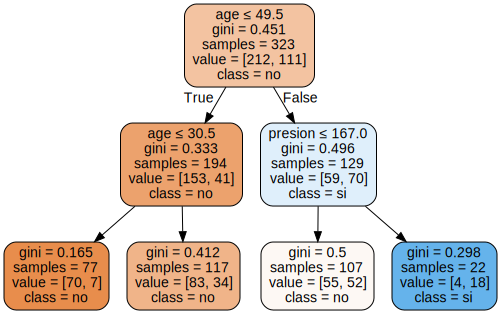

In [29]:
dot_data = tree.export_graphviz(trf, out_file=None,
                     feature_names=['age','presion'],  
                     class_names=['no','si'], 
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = gv.Source(dot_data)  
graph 

In [33]:
yp=trf.predict(X_test)
print('Porcentaje de datos bien clasificados')
print(accuracy_score(y_test,yp))
print('número de datos bien clasificados')
accuracy_score(y_test,yp,normalize=False)

Porcentaje de datos bien clasificados
0.6330935251798561
número de datos bien clasificados


88

In [173]:
#dot_data = tree.export_graphviz(trf, out_file=None) 
#graph = gv.Source(dot_data) 
#graph.render("iris") 

Ojo: Scikit-Learn usa una versión optimizada del algoritmo CART el cual es un algoritmo muy similar a C4.5, sin embargo esta implementación no soporta variables categoricas por ahora.

